In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

,Unnamed: 0,CHCKDNY2,_DRDXAR2,SDHBILLS,SDHSTRE1,_SMOKER3,SDLONELY,SDHFOOD1,_CASTHM1,SDHEMPLY,...,_TOTINDA,_CHLDCNT,_RFBING6,MARITAL,_INCOMG1,EMTSUPRT,_SEX,_EDUCAG,ADDEPEV3,year
0,0,2.0,2.0,2.0,5.0,4.0,5.0,5.0,1.0,2.0,...,2.0,1.0,1.0,1.0,9.0,1.0,2.0,3.0,2.0,2023
1,1,2.0,1.0,2.0,5.0,4.0,3.0,5.0,1.0,2.0,...,1.0,1.0,1.0,2.0,9.0,2.0,2.0,3.0,1.0,2023
2,2,2.0,1.0,1.0,3.0,3.0,3.0,5.0,2.0,2.0,...,1.0,1.0,1.0,3.0,1.0,4.0,2.0,2.0,2.0,2023
3,3,2.0,1.0,2.0,5.0,4.0,3.0,5.0,1.0,2.0,...,1.0,1.0,1.0,1.0,9.0,1.0,2.0,3.0,1.0,2023
4,4,2.0,1.0,2.0,2.0,4.0,2.0,4.0,1.0,2.0,...,1.0,1.0,1.0,3.0,5.0,2.0,2.0,3.0,1.0,2023


In [3]:
df_clean = df.copy()

df_clean = df_clean.replace([9, 7], float('nan'))

df_clean = df_clean.dropna()

print(f"Original shape: {df.shape}")
print(f"Shape after cleaning: {df_clean.shape}")

df_clean.head()

Original shape: (878455, 28)
Shape after cleaning: (191010, 28)


,Unnamed: 0,CHCKDNY2,_DRDXAR2,SDHBILLS,SDHSTRE1,_SMOKER3,SDLONELY,SDHFOOD1,_CASTHM1,SDHEMPLY,...,_TOTINDA,_CHLDCNT,_RFBING6,MARITAL,_INCOMG1,EMTSUPRT,_SEX,_EDUCAG,ADDEPEV3,year
4,4.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,1.0,2.0,...,1.0,1.0,1.0,3.0,5.0,2.0,2.0,3.0,1.0,2023
6,6.0,2.0,1.0,2.0,5.0,3.0,4.0,5.0,1.0,2.0,...,2.0,1.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,2023
10,10.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,5.0,1.0,1.0,3.0,2.0,2023
15,15.0,2.0,1.0,2.0,5.0,4.0,3.0,5.0,1.0,2.0,...,1.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2023
32,32.0,2.0,1.0,2.0,4.0,3.0,3.0,3.0,1.0,2.0,...,1.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,2023


In [ ]:
# df_clean = df_clean[df_clean['year'] != 2022]

In [4]:
df_clean.drop(columns=['Unnamed: 0', 'year'], inplace=True)

In [5]:
df_clean['ADDEPEV3'] = df_clean['ADDEPEV3'].replace(2.0, 0.0)

In [6]:
X = df_clean.drop('ADDEPEV3', axis=1)
y = df_clean['ADDEPEV3']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## SMOTE

In [8]:
smote = SMOTE(sampling_strategy="auto", random_state=42)

In [9]:
df_clean.shape

(191010, 26)

In [10]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## GradientBoostingClassifier

In [11]:
gb_model = GradientBoostingClassifier(random_state=42)

In [12]:
gb_model.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(random_state=42)

In [13]:
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

In [14]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_proba_gb)

In [15]:
print(f"\nGradient Boosting with SMOTE results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting with SMOTE results:
Accuracy: 0.7982
ROC AUC: 0.8130

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     35727
         1.0       0.64      0.45      0.53     12026

    accuracy                           0.80     47753
   macro avg       0.74      0.68      0.70     47753
weighted avg       0.78      0.80      0.78     47753



## HistGradientBoostingClassifier

In [16]:
hgb_model = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')

hgb_model.fit(X_train, y_train)

y_pred_hgb = hgb_model.predict(X_test)
y_pred_proba_hgb = hgb_model.predict_proba(X_test)[:, 1]

In [17]:
hgb_accuracy = accuracy_score(y_test, y_pred_hgb)
hgb_roc_auc = roc_auc_score(y_test, y_pred_proba_hgb)

print(f"\nHistogram-based Gradient Boosting with SMOTE results:")
print(f"Accuracy: {hgb_accuracy:.4f}")
print(f"ROC AUC: {hgb_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hgb))


Histogram-based Gradient Boosting with SMOTE results:
Accuracy: 0.7433
ROC AUC: 0.8174

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81     35727
         1.0       0.49      0.73      0.59     12026

    accuracy                           0.74     47753
   macro avg       0.69      0.74      0.70     47753
weighted avg       0.79      0.74      0.76     47753



## RandomForest + Weighted Class

In [18]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"\nRandom Forest with SMOTE results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest with SMOTE results:
Accuracy: 0.7922
ROC AUC: 0.7951

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     35727
         1.0       0.65      0.37      0.48     12026

    accuracy                           0.79     47753
   macro avg       0.73      0.65      0.67     47753
weighted avg       0.77      0.79      0.77     47753



## Random Forest + SMOTE

In [21]:
rfs_model = RandomForestClassifier(random_state=42)
rfs_model.fit(X_train_balanced, y_train_balanced)
y_pred_rfs = rfs_model.predict(X_test)

In [22]:
rfs_accuracy = accuracy_score(y_test, y_pred_rfs)
rfs_roc_auc = roc_auc_score(y_test, rfs_model.predict_proba(X_test)[:, 1])

print(f"\nRandom Forest with SMOTE results:")
print(f"Accuracy: {rfs_accuracy:.4f}")
print(f"ROC AUC: {rfs_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfs))


Random Forest with SMOTE results:
Accuracy: 0.7928
ROC AUC: 0.7955

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     35727
         1.0       0.63      0.42      0.50     12026

    accuracy                           0.79     47753
   macro avg       0.73      0.67      0.69     47753
weighted avg       0.78      0.79      0.78     47753



In [23]:
#Summary of results
results_summary = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Histogram-based Gradient Boosting', 'Random Forest', 'Random Forest with SMOTE'],
    'Accuracy': [gb_accuracy, hgb_accuracy, rf_accuracy, rfs_accuracy],
    'ROC AUC': [roc_auc, hgb_roc_auc, rf_roc_auc, rfs_roc_auc]
})

print("\nSummary of Results:")
print(results_summary)


Summary of Results:
                               Model  Accuracy   ROC AUC
0                  Gradient Boosting  0.798191  0.812987
1  Histogram-based Gradient Boosting  0.743304  0.817426
2                      Random Forest  0.792202  0.795127
3           Random Forest with SMOTE  0.792809  0.795454


In [24]:
gb_space = [
    Integer(50, 300, name='n_estimators'),
    Real(0.01, 0.3, name='learning_rate'),
    Integer(3, 10, name='max_depth'),
    Real(0.1, 1.0, name='subsample'),
    Integer(2, 10, name='min_samples_split'),
    Integer(2, 10, name='min_samples_leaf')
]

hgb_space = [
    Integer(50, 300, name='max_iter'),
    Real(0.01, 0.3, name='learning_rate'),
    Integer(3, 10, name='max_depth'),
    Real(0.1, 1.0, name='subsample'),
    Integer(1, 20, name='min_samples_leaf')
]

rf_space = [
    Integer(50, 300, name='n_estimators'),
    Integer(3, 15, name='max_depth'),
    Integer(2, 20, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf'),
    Real(0.1, 1.0, name='max_samples')
]

In [25]:
# # Gradient Boosting optimization
# @use_named_args(gb_space)
# def gb_objective(**params):
#     model = GradientBoostingClassifier(random_state=42, **params)
#     return -np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv=3, scoring='roc_auc'))

# print("Optimizing Gradient Boosting...")
# gb_result = gp_minimize(gb_objective, gb_space, n_calls=50, random_state=42)

# # Histogram-based Gradient Boosting optimization
# @use_named_args(hgb_space)
# def hgb_objective(**params):
#     model = HistGradientBoostingClassifier(random_state=42, class_weight='balanced', **params)
#     return -np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv=3, scoring='roc_auc'))

# print("Optimizing Histogram-based Gradient Boosting...")
# hgb_result = gp_minimize(hgb_objective, hgb_space, n_calls=50, random_state=42)

# # Random Forest optimization
# @use_named_args(rf_space)
# def rf_objective(**params):
#     model = RandomForestClassifier(random_state=42, class_weight='balanced', **params)
#     return -np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv=3, scoring='roc_auc'))

In [26]:


# print("Optimizing Random Forest...")
# rf_result = gp_minimize(rf_objective, rf_space, n_calls=50, random_state=42)

# best_gb_params = dict(zip([dim.name for dim in gb_space], gb_result.x))
# best_hgb_params = dict(zip([dim.name for dim in hgb_space], hgb_result.x))
# best_rf_params = dict(zip([dim.name for dim in rf_space], rf_result.x))

# print("\nBest Parameters:")
# print(f"Gradient Boosting: {best_gb_params}")
# print(f"Histogram-based GB: {best_hgb_params}")
# print(f"Random Forest: {best_rf_params}")

## Tunning RF

In [ ]:
rf_search = BayesSearchCV(
    rf_model,
    {
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 15),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 10),
        'max_samples' : Real(0.1, 1.0),
    },
    n_iter=30,
    cv=5,
    scoring='f1',
    random_state=42
)
rf_search.fit(X_train, y_train)

## Tunning GB + SMOTE

In [ ]:
# pipeline = Pipeline([
#     ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
#     ('gb', GradientBoostingClassifier(random_state=42))
# ])

# gb_search = BayesSearchCV(
#     pipeline,
#     {
#         'gb__n_estimators': Integer(50, 300),
#         'gb__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
#         'gb__max_depth': Integer(3, 10),
#         'gb__subsample': Real(0.1, 1.0),
#         'gb__min_samples_split' : Integer(2, 10),
#         'gb__min_samples_leaf' : Integer(2, 10)
#     },
#     n_iter=30,
#     cv=5,
#     scoring='f1',
#     random_state=42
# )
# gb_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                        ('gb',
                                         GradientBoostingClassifier(random_state=42))]),
              n_iter=30, random_state=42, scoring='f1',
              search_spaces={'gb__learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'gb__max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'gb__min_samples_leaf': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'gb__min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'gb__n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize'),
                             'gb__subsample': Real(low=0.1, high=1.0, prior='uniform', transform='normalize')})

## Tunning HGB

In [ ]:
hist_search = BayesSearchCV(
    hgb_model,
    {
        'learning_rate': Real(0.01, 0.3),
        'max_iter': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'min_samples_leaf': Integer(10, 100),
    },
    n_iter=30,
    cv=5,
    scoring='f1',
    random_state=42
)
hist_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                       random_state=42),
              n_iter=30, random_state=42, scoring='f1',
              search_spaces={'learning_rate': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_iter': Integer(low=50, high=300, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize')})

# Evaluation

🔍 Evaluating: RF
RF Best CV Score (train CV): 0.5863
RF Best Params: OrderedDict({'max_depth': 15, 'max_samples': 1.0, 'min_samples_leaf': 9, 'min_samples_split': 20, 'n_estimators': 300})

RF Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83     17683
         1.0       0.51      0.67      0.58      5749

    accuracy                           0.76     23432
   macro avg       0.69      0.73      0.70     23432
weighted avg       0.79      0.76      0.77     23432

RF Confusion Matrix:
[[13928  3755]
 [ 1890  3859]]


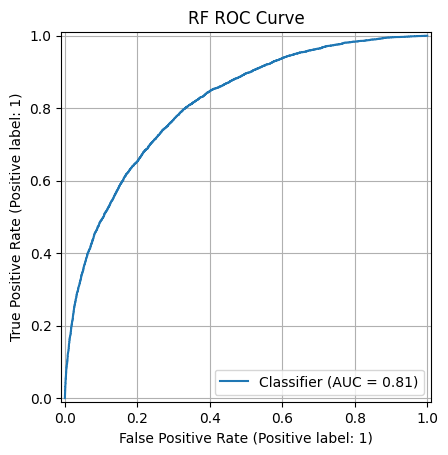

🔍 Evaluating: GB
GB Best CV Score (train CV): 0.5472
GB Best Params: OrderedDict({'gb__learning_rate': 0.014661782374320446, 'gb__max_depth': 4, 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 2, 'gb__n_estimators': 50, 'gb__subsample': 0.1})

GB Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84     17683
         1.0       0.51      0.58      0.54      5749

    accuracy                           0.76     23432
   macro avg       0.68      0.70      0.69     23432
weighted avg       0.77      0.76      0.76     23432

GB Confusion Matrix:
[[14423  3260]
 [ 2408  3341]]


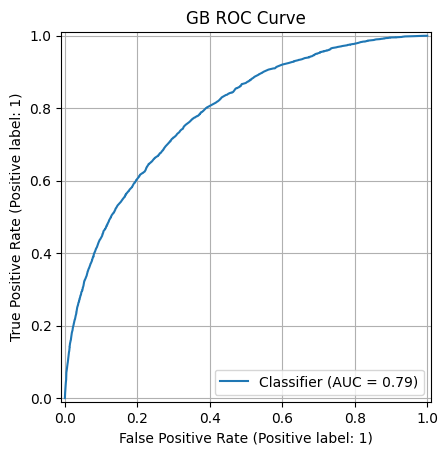

🔍 Evaluating: HistGB
HistGB Best CV Score (train CV): 0.5863
HistGB Best Params: OrderedDict({'learning_rate': 0.07941336708949642, 'max_depth': 3, 'max_iter': 300, 'min_samples_leaf': 47})

HistGB Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82     17683
         1.0       0.49      0.72      0.58      5749

    accuracy                           0.75     23432
   macro avg       0.69      0.74      0.70     23432
weighted avg       0.79      0.75      0.76     23432

HistGB Confusion Matrix:
[[13363  4320]
 [ 1587  4162]]


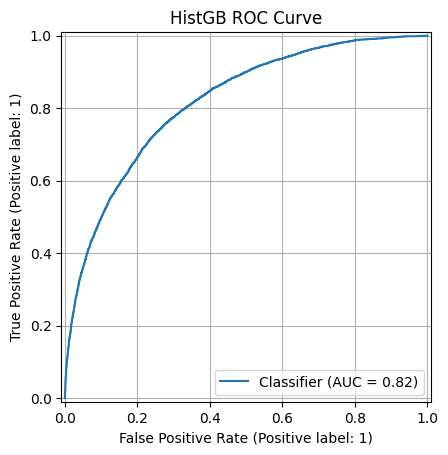

In [ ]:
for name, model in [("RF", rf_search), ("HistGB", hist_search)]:
    print(f"🔍 Evaluating: {name}")

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"{name} Best CV Score (train CV): {model.best_score_:.4f}")
    print(f"{name} Best Params: {model.best_params_}\n")

    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{name} ROC Curve")
    plt.grid(True)
    plt.show()